In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os



In [2]:
df = pd.read_csv("India_Renewable_Energy_MASTER_DATASET_Calculated.csv")
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

df['Wind_Power_Density_Log'] = np.log1p(df['Wind_Power_Density'])

target_var = 'Wind_Power_Density'
target_var_log = 'Wind_Power_Density_Log'
metadata_vars = ['Date', 'State', 'Latitude', 'Longitude']

features = [
    col for col in df.columns if col not in
    [target_var, target_var_log] + metadata_vars
]
(f" features: {features}")




" features: ['WS10M', 'WS50M', 'PS', 'T2M', 'WD10M', 'T2M_MAX', 'T2M_MIN', 'T2MDEW', 'RH2M', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'Air_Density']"

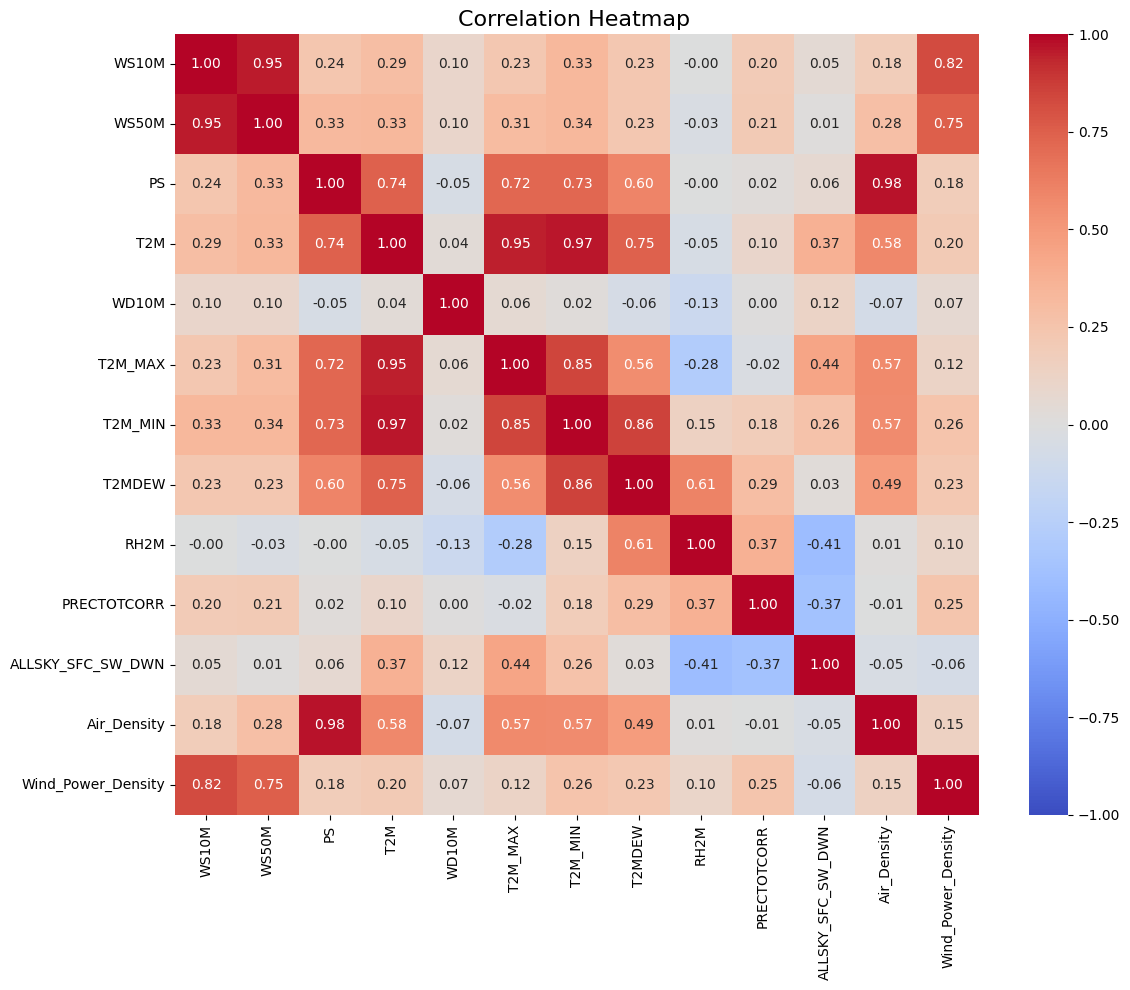

In [ ]:
plt.figure(figsize=(12, 10))
model_features_corr = df[features + [target_var]].corr()
sns.heatmap(model_features_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ', fontsize=16)
plt.tight_layout()




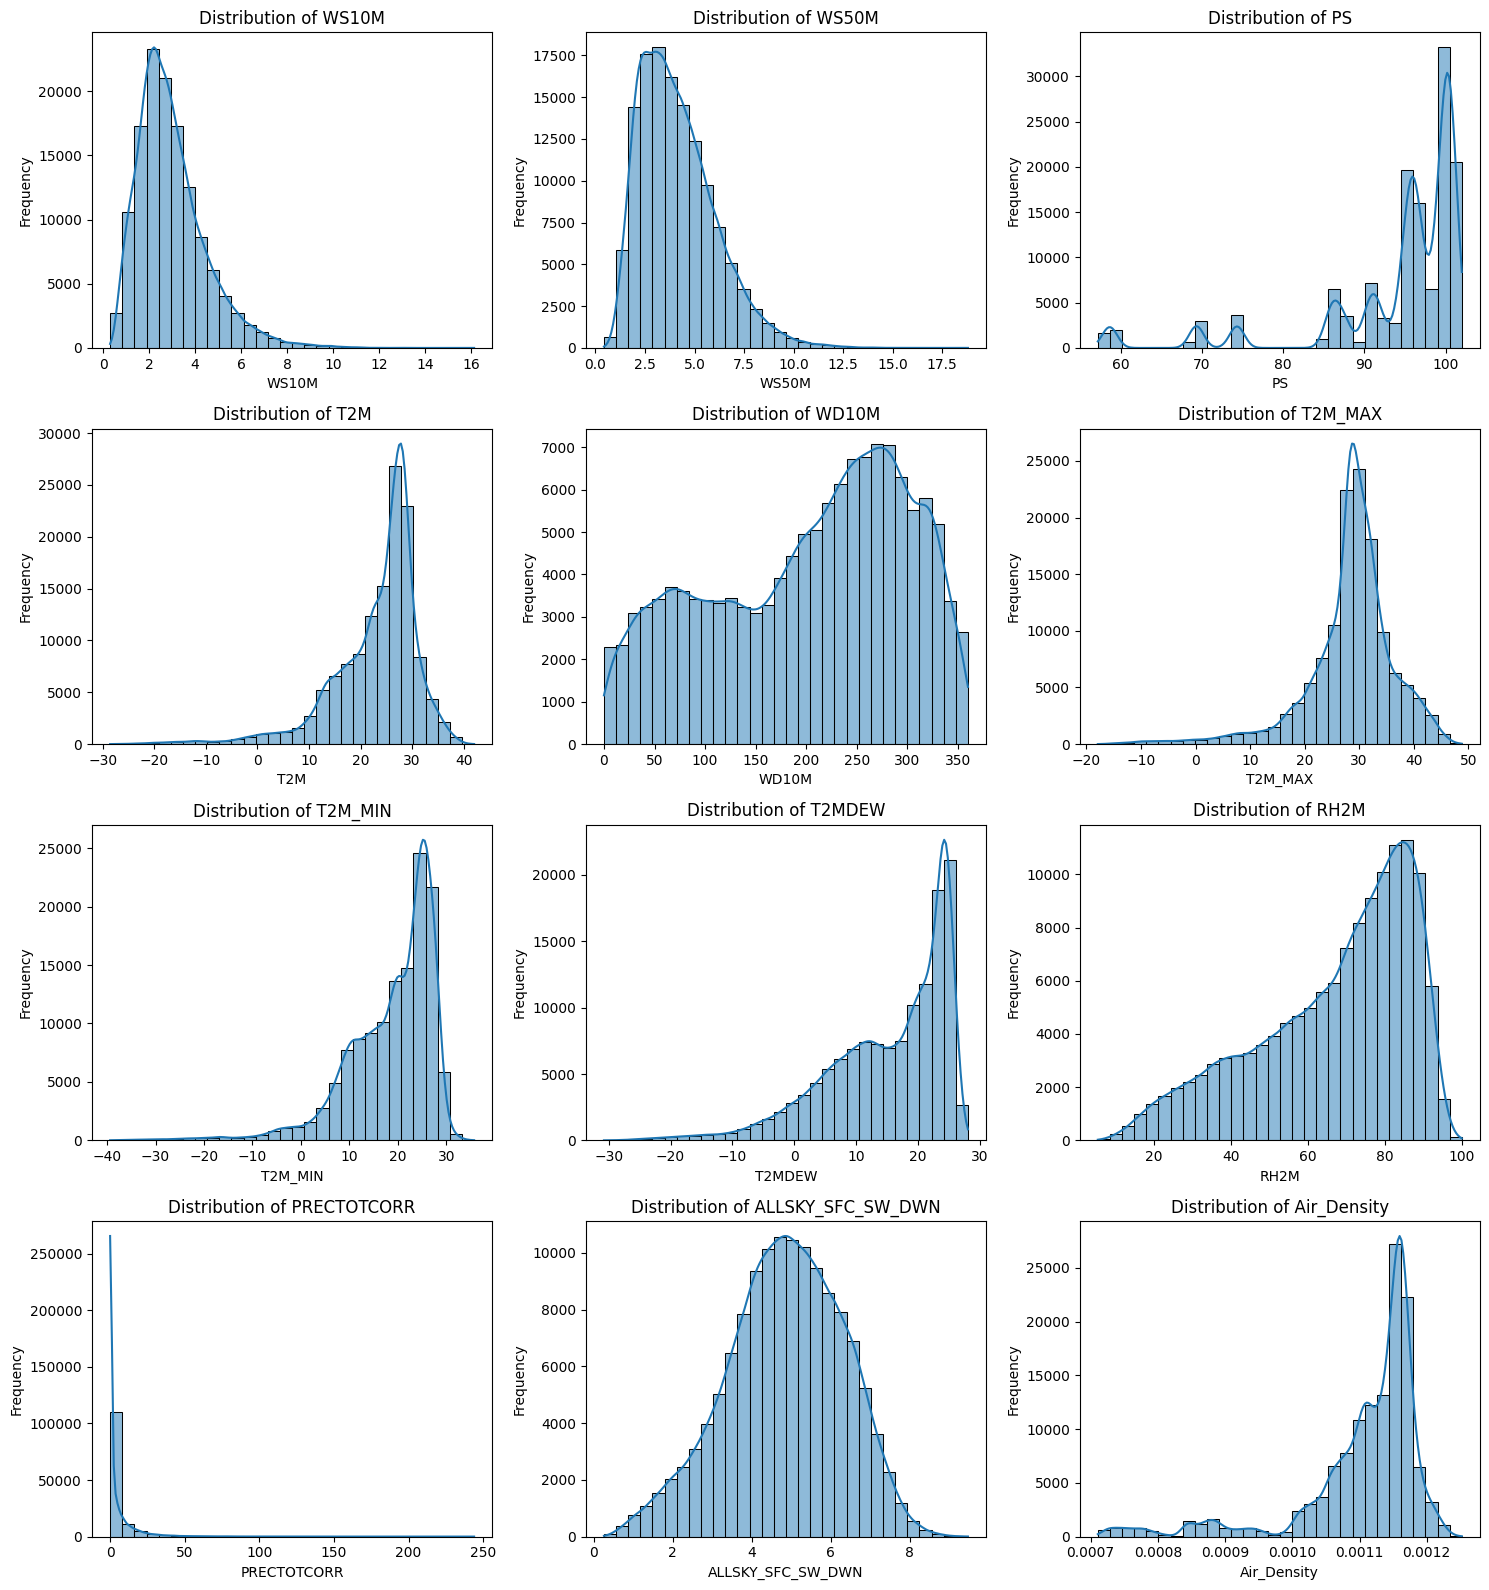

In [ ]:
num_features = len(features)
num_cols = 3
num_rows = int(np.ceil(num_features / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
axes = axes.flatten() 
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
fig.tight_layout()



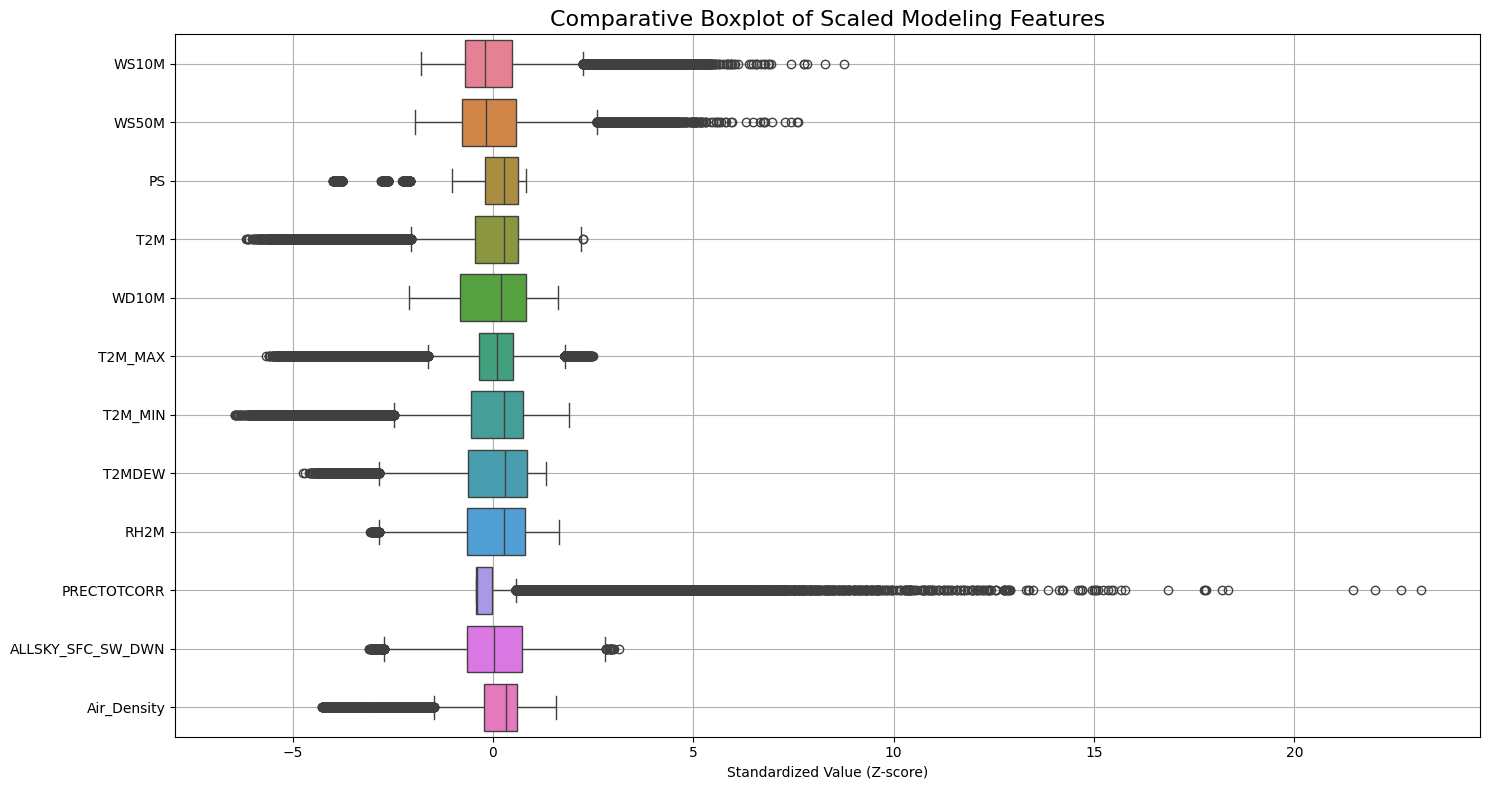

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled, orient='h')
plt.title('Comparative Boxplot of Scaled Modeling Features', fontsize=16)
plt.xlabel('Standardized Value (Z-score)')
plt.grid(True)
plt.tight_layout()



<Figure size 1500x1500 with 0 Axes>

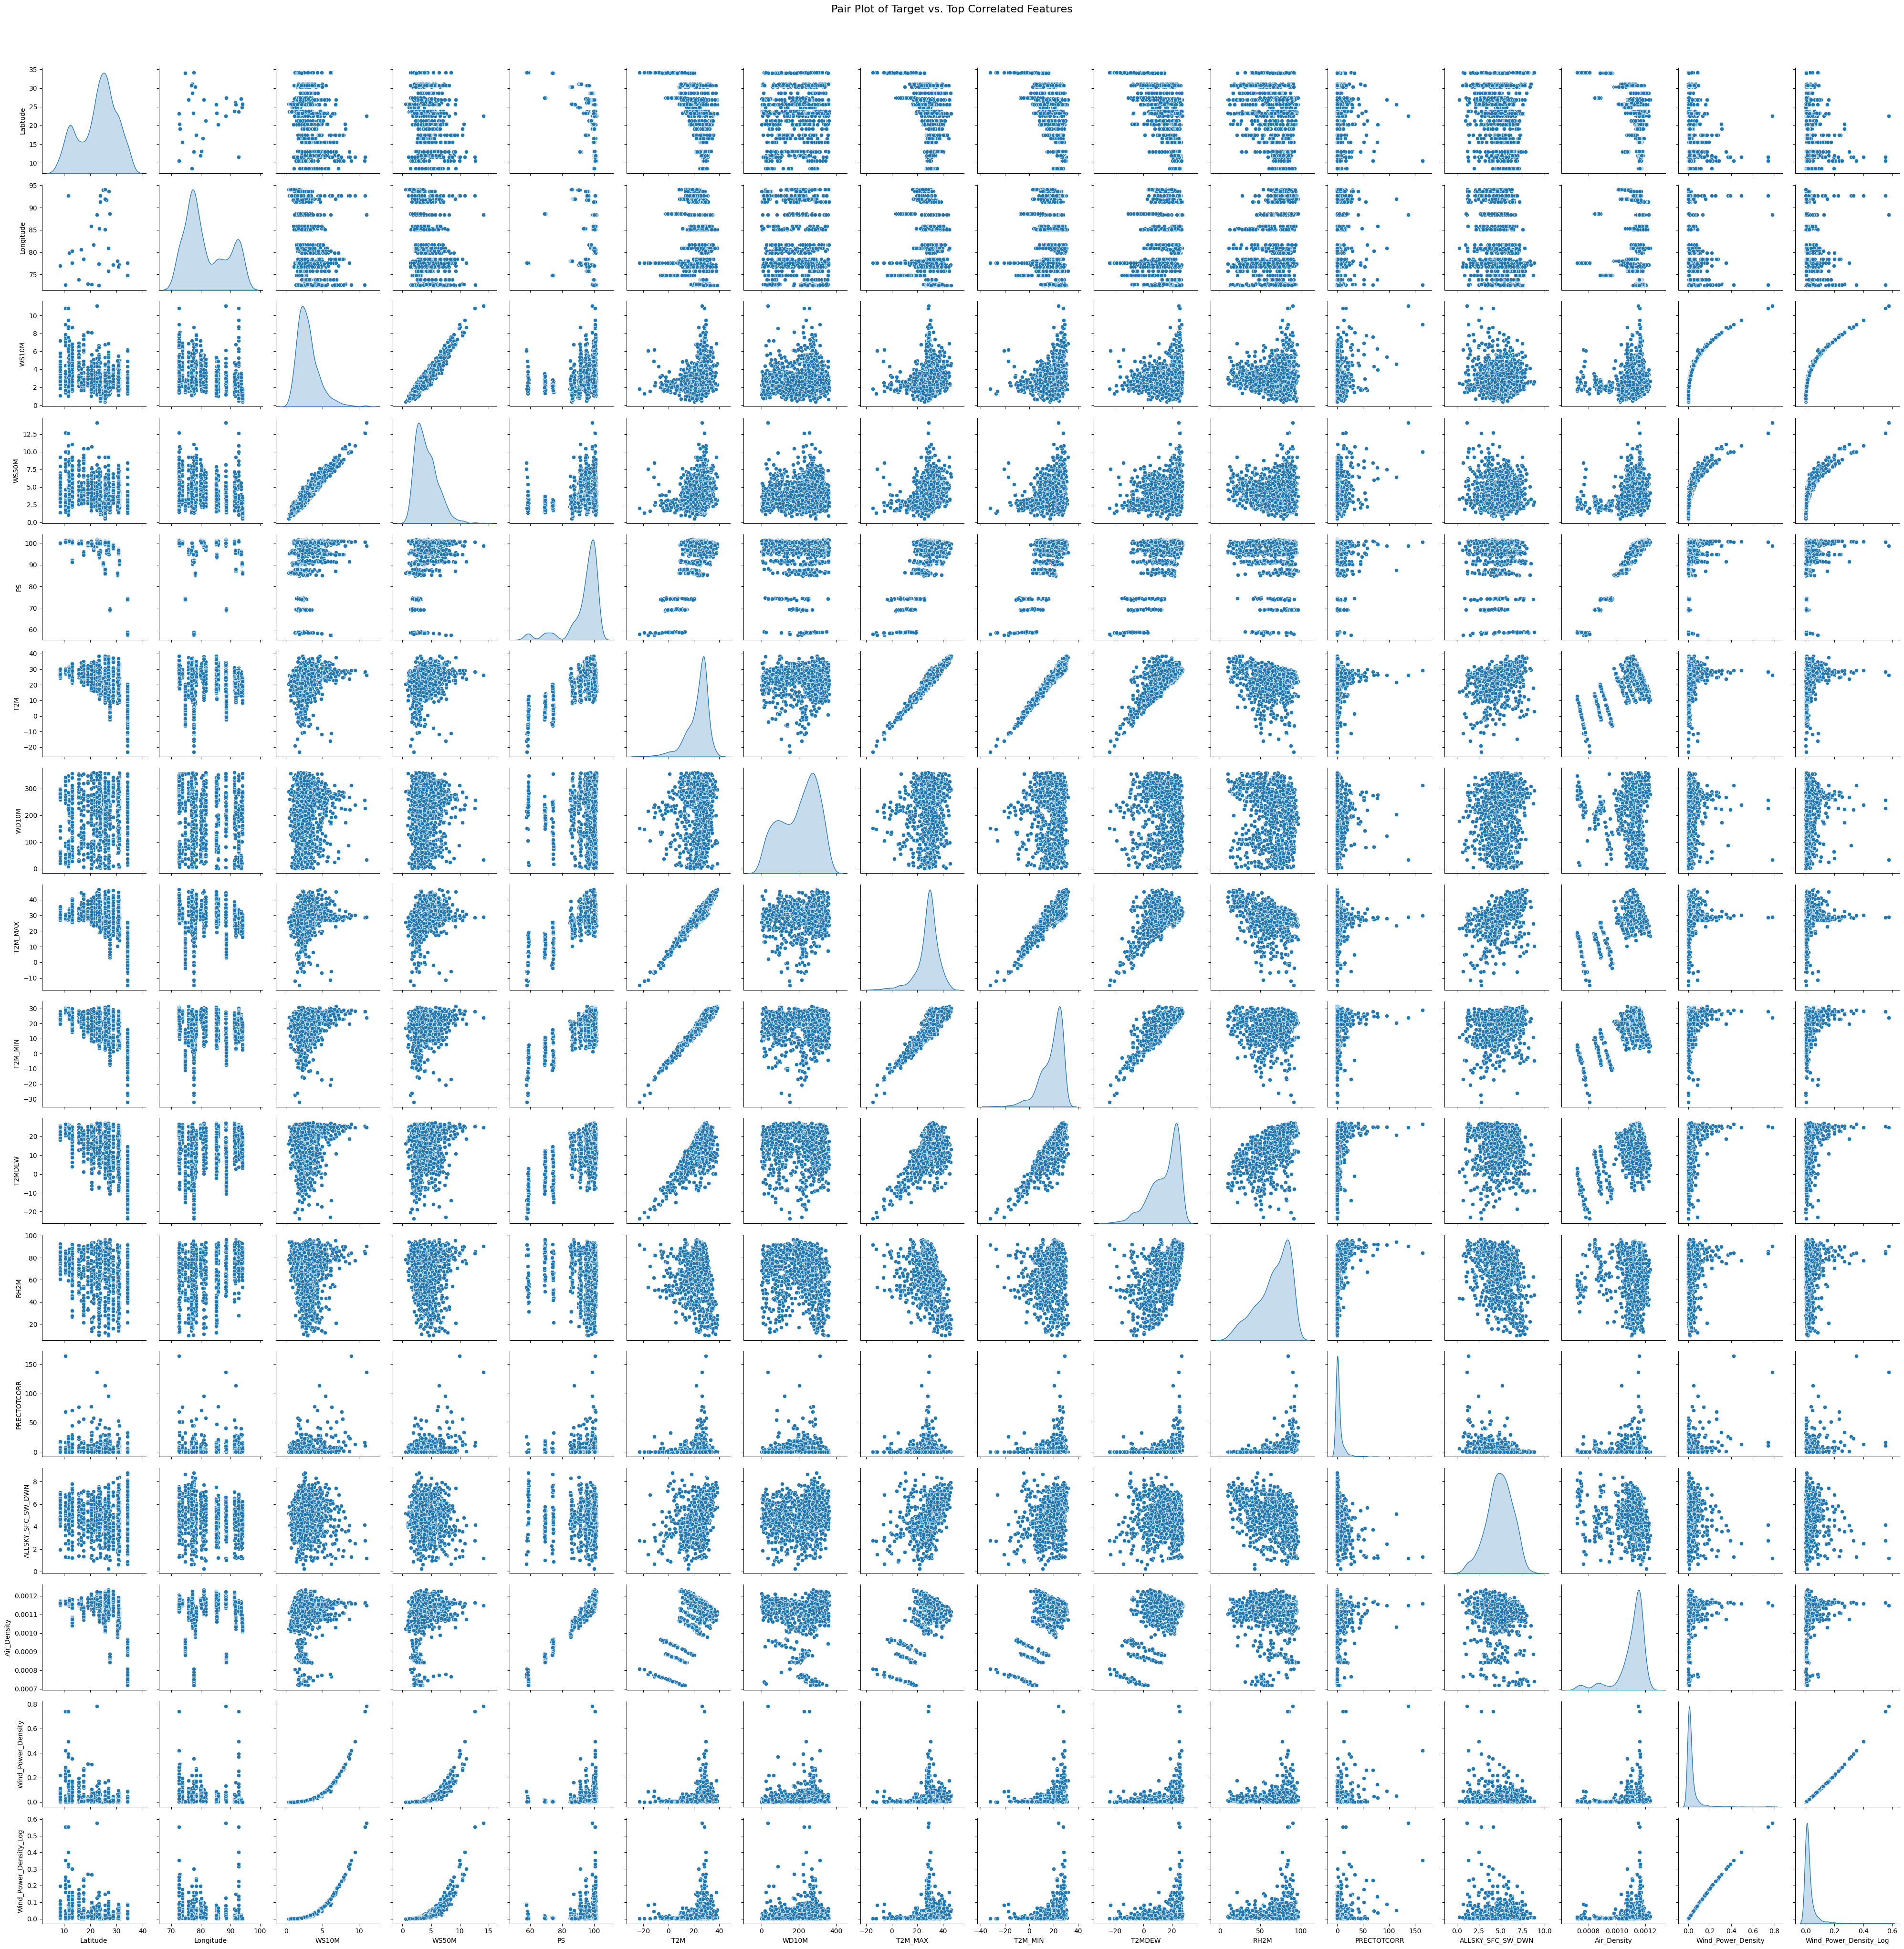

In [ ]:

pairplot_sample = df.sample(n=min(1000, len(df)), random_state=1)

plt.figure(figsize=(15, 15))
sns.pairplot(pairplot_sample, hue=None, diag_kind='kde')
plt.suptitle('Pair Plot of Target vs. Top Correlated Features', y=1.02, fontsize=16)
plt.tight_layout()




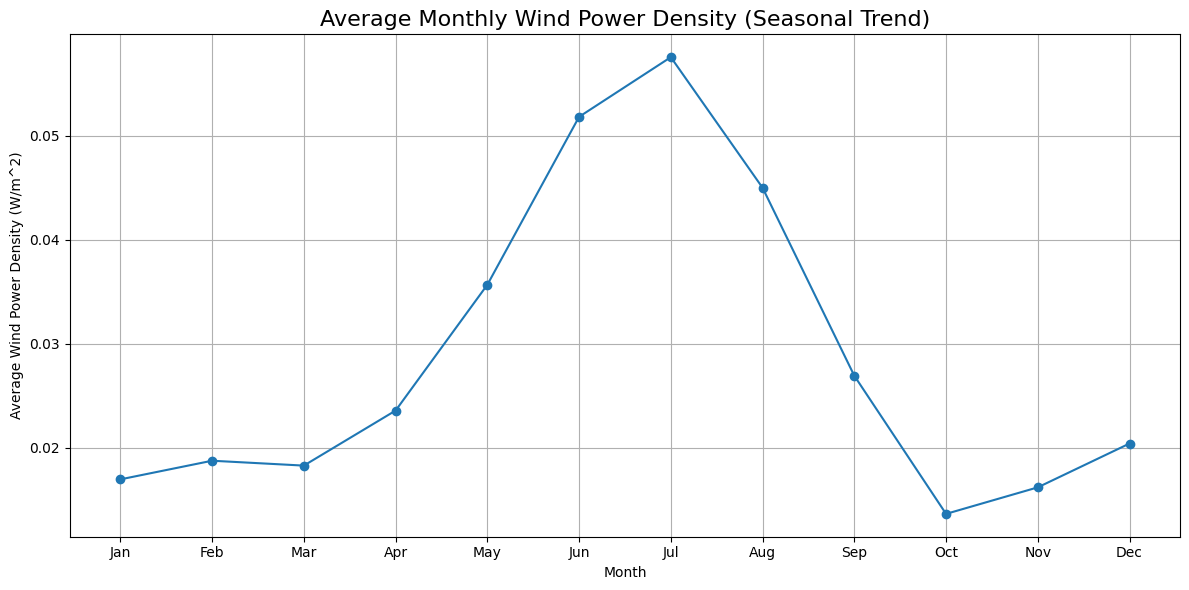

In [ ]:
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

monthly_avg = df.groupby('month')[target_var].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Monthly Wind Power Density (Seasonal Trend)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Wind Power Density (W/m^2)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both')
plt.tight_layout()  



In [ ]:
df.drop(columns=['month', 'year', 'Wind_Power_Density_Log'], inplace=True)